# **Prediksi Risiko Penyakit Paru Menggunakan Random Forest**

### **Sumber Dataset**

[Kuesioner Riwayat Pneumonia](https://docs.google.com/forms/d/e/1FAIpQLSd50WbqUgKIfrzsJP8G-w31tassY3fM5SOeKgfaKfKOJwOe4Q/viewform)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Load Dataset from CSV 
data = pd.read_csv("kuesioner_clear.csv")

# Display first few rows of data
data.head()

,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,Muda,Laki-Laki,Tidak,Ya,Tidak,Tidak,Tidak,Ya,Tidak,Tidak
1,Muda,Perempuan,Tidak,Tidak,Ya,Ya,Tidak,Tidak,Tidak,Tidak
2,Muda,Perempuan,Tidak,Ya,Ya,Ya,Tidak,Ya,Tidak,Tidak
3,Muda,Laki-Laki,Tidak,Ya,Ya,Tidak,Tidak,Ya,Ya,Tidak
4,Muda,Laki-Laki,Tidak,Ya,Ya,Ya,Tidak,Ya,Tidak,Ya


In [19]:
# Basic data information
print("Dataset shape:", data.shape)
print("\nDataset info:")
data.info()

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Distribution of target variable
print("\nTarget distribution:")
target_dist = data['Hasil'].value_counts(normalize=True) * 100
print(target_dist)

Dataset shape: (106, 10)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Usia                106 non-null    int64
 1   Jenis_Kelamin       106 non-null    int64
 2   Merokok             106 non-null    int64
 3   Bekerja             106 non-null    int64
 4   Rumah_Tangga        106 non-null    int64
 5   Aktivitas_Begadang  106 non-null    int64
 6   Aktivitas_Olahraga  106 non-null    int64
 7   Asuransi            106 non-null    int64
 8   Penyakit_Bawaan     106 non-null    int64
 9   Hasil               106 non-null    int64
dtypes: int64(10)
memory usage: 8.4 KB

Missing values:
Usia                  0
Jenis_Kelamin         0
Merokok               0
Bekerja               0
Rumah_Tangga          0
Aktivitas_Begadang    0
Aktivitas_Olahraga    0
Asuransi              0
Penyakit_Bawaan       0
Hasil              

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encoding Data Kategori menjadi Numerik
encoder = LabelEncoder()

for col in ['Usia', 'Jenis_Kelamin', 'Merokok', 'Bekerja', 
            'Rumah_Tangga', 'Aktivitas_Begadang', 'Aktivitas_Olahraga', 
            'Asuransi', 'Penyakit_Bawaan', 'Hasil']:
    data[col] = encoder.fit_transform(data[col])

data.head()

,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,0,0,0,1,0,0,0,1,0,0
1,0,1,0,0,1,1,0,0,0,0
2,0,1,0,1,1,1,0,1,0,0
3,0,0,0,1,1,0,0,1,1,0
4,0,0,0,1,1,1,0,1,0,1


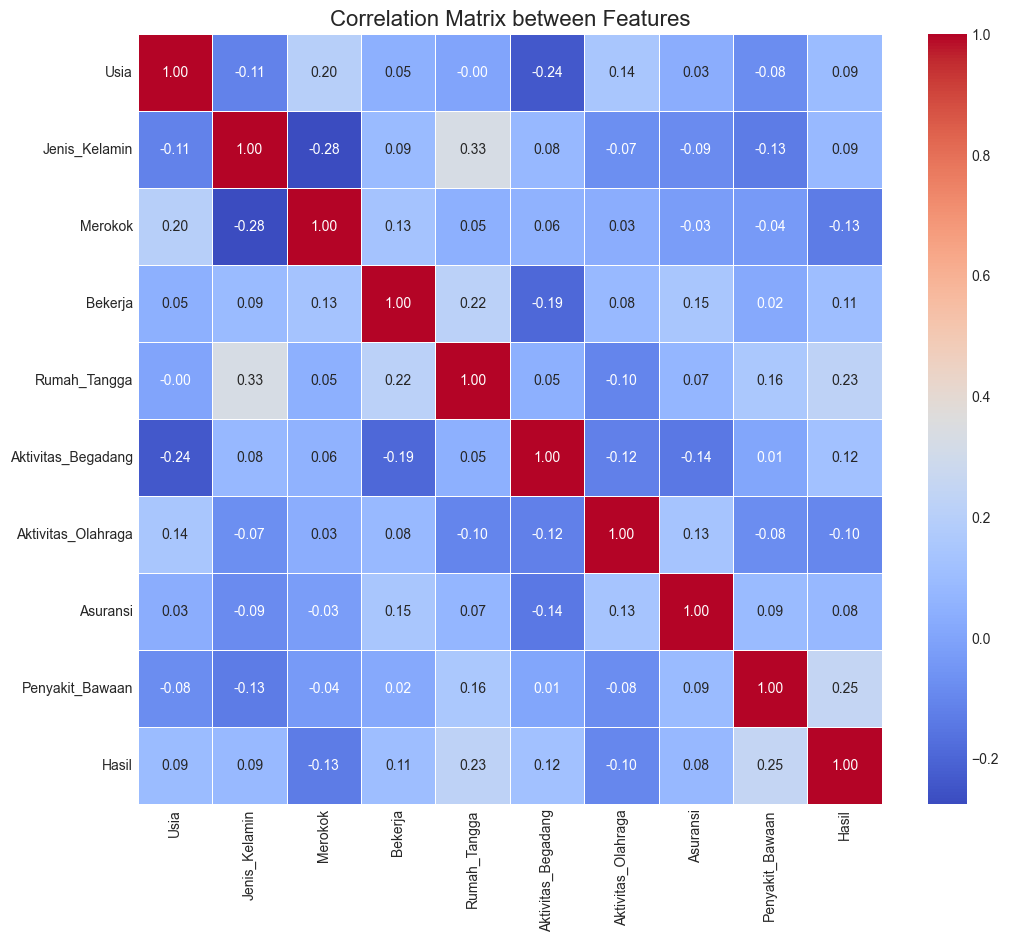

In [9]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between Features', fontsize=16)
plt.show()

In [11]:
# Data preparation for modeling
from sklearn.model_selection import train_test_split

# Select features and target
X = data.drop(['Hasil'], axis=1)
y = data['Hasil']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability for class 1

# Model evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9091
ROC-AUC: 0.8500

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       0.00      0.00      0.00         2

    accuracy                           0.91        22
   macro avg       0.45      0.50      0.48        22
weighted avg       0.83      0.91      0.87        22



d:\Projects\Kuliah\Kecerdasan Buatan\lung-disease-risk-prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Projects\Kuliah\Kecerdasan Buatan\lung-disease-risk-prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Projects\Kuliah\Kecerdasan Buatan\lung-disease-risk-prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

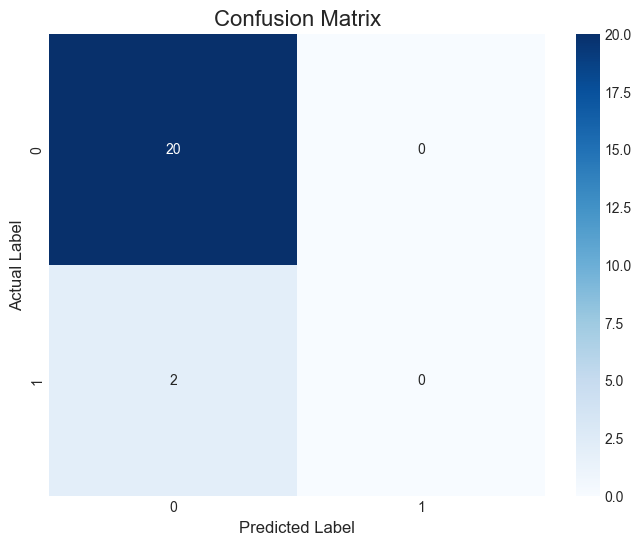

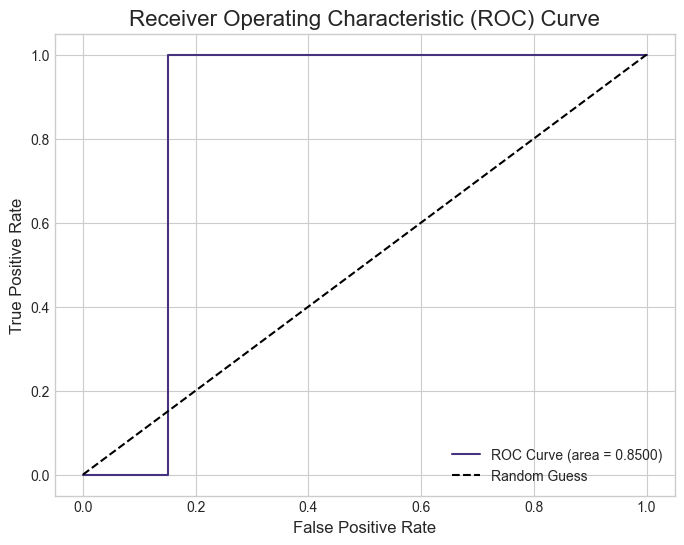

In [13]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc_score(y_test, y_prob):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()

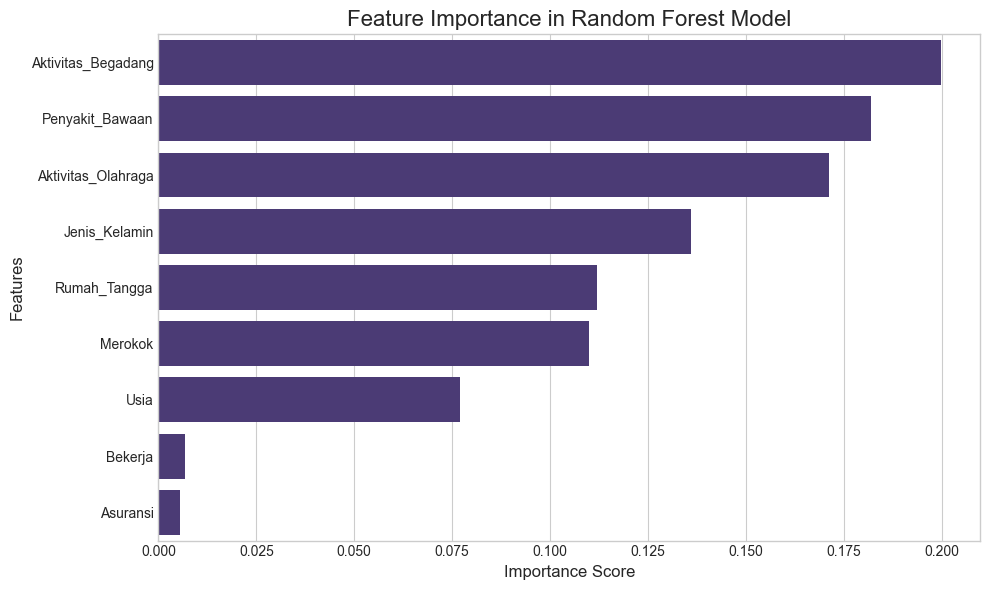

Feature Importance Ranking:
              Feature  Importance
5  Aktivitas_Begadang    0.199779
8     Penyakit_Bawaan    0.181886
6  Aktivitas_Olahraga    0.171301
1       Jenis_Kelamin    0.135868
4        Rumah_Tangga    0.111854
2             Merokok    0.109985
0                Usia    0.077003
3             Bekerja    0.006687
7            Asuransi    0.005638


In [14]:
# Get feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Model', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

print("Feature Importance Ranking:")
print(feature_importance_df)

C:\Users\rizbud\AppData\Local\Temp\ipykernel_15768\312483537.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='Individu', x='Probabilitas', data=plot_data, palette='viridis')


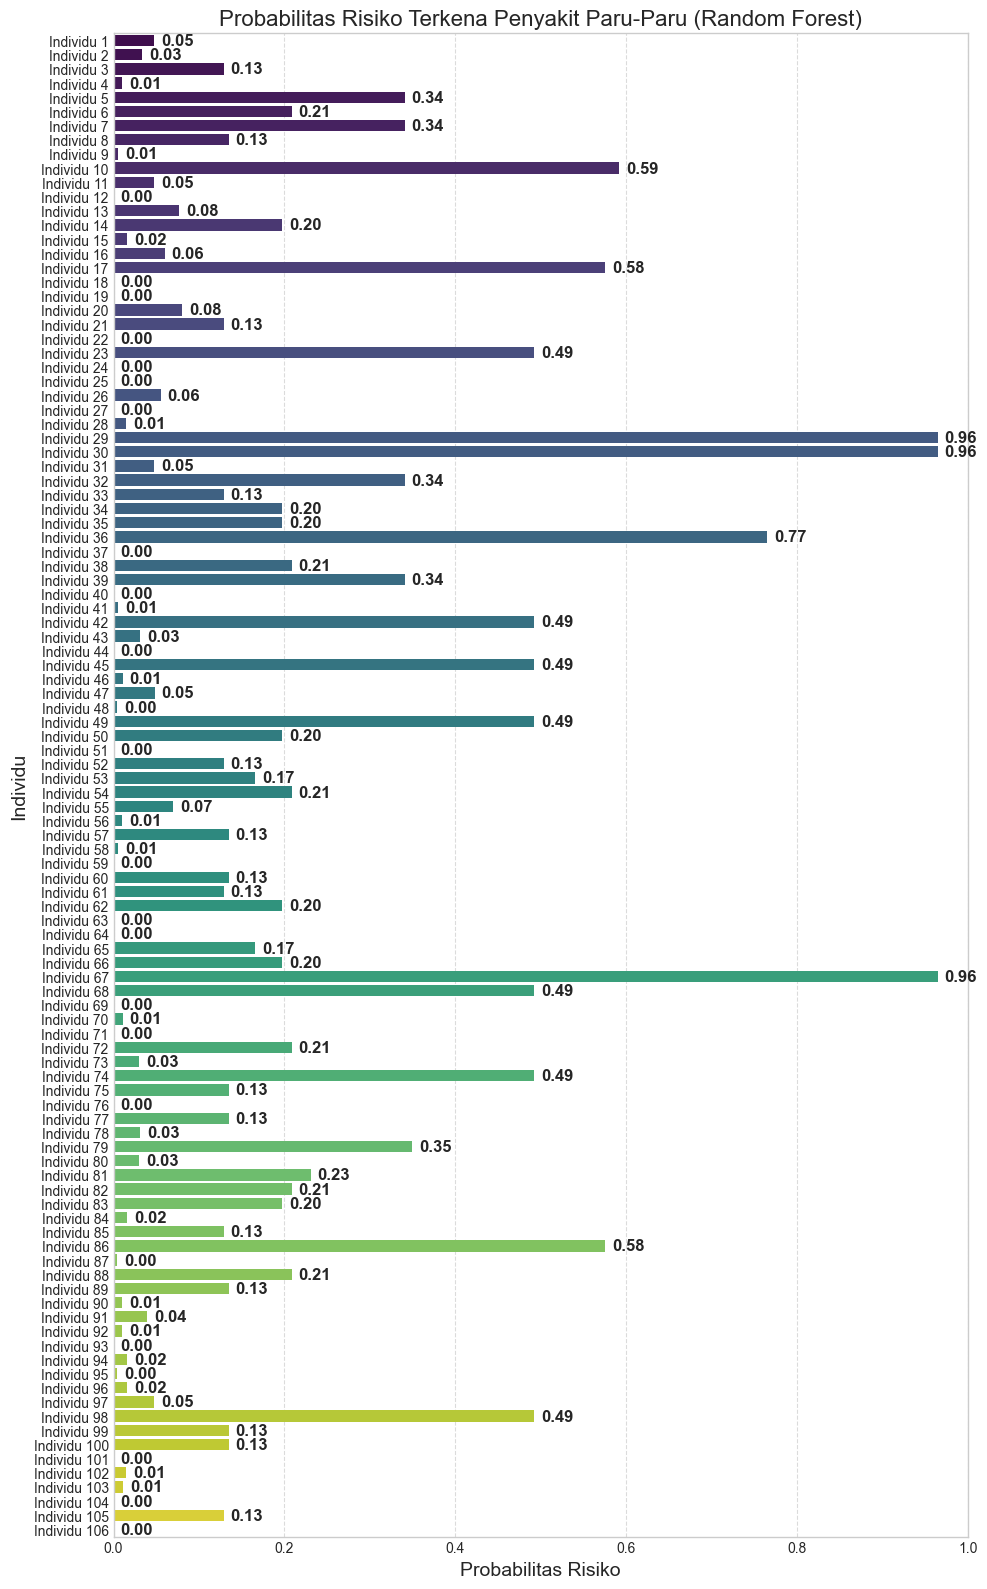

In [16]:
# Prediksi pada data baru dari kuesioner
new_data = pd.read_csv("processed_kuesioner.csv")

# Persiapkan data untuk prediksi
predicted_risk = rf_model.predict_proba(new_data)[:, 1]
# print("Probabilitas Risiko:", [f"{risk:.2f}" for risk in predicted_risk])

# Visualisasi probabilitas risiko (horizontal bar chart)
plt.figure(figsize=(10, 16))

plot_data = pd.DataFrame({
    'Individu': [f'Individu {i+1}' for i in range(len(predicted_risk))],
    'Probabilitas': predicted_risk
})

# Sort by probability (optional)
# plot_data = plot_data.sort_values('Probabilitas', ascending=False)

ax = sns.barplot(y='Individu', x='Probabilitas', data=plot_data, palette='viridis')

# Add labels on bars
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_width():.2f}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0), textcoords='offset points',
                fontsize=12, fontweight='bold')

plt.title('Probabilitas Risiko Terkena Penyakit Paru-Paru (Random Forest)', fontsize=16)
plt.xlabel('Probabilitas Risiko', fontsize=14)
plt.ylabel('Individu', fontsize=14)
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use smaller parameter grid for demonstration (comment out above and uncomment below for faster execution)
# param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [None, 10],
#     'min_samples_split': [2, 5]
# }

# Grid search for best parameters
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Get best model
best_rf = grid_search.best_estimator_

# Evaluate best model
y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:, 1]

print(f"\nTuned Model Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Tuned Model ROC-AUC: {roc_auc_score(y_test, y_prob_best):.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.8816

Tuned Model Accuracy: 0.9091
Tuned Model ROC-AUC: 0.8000


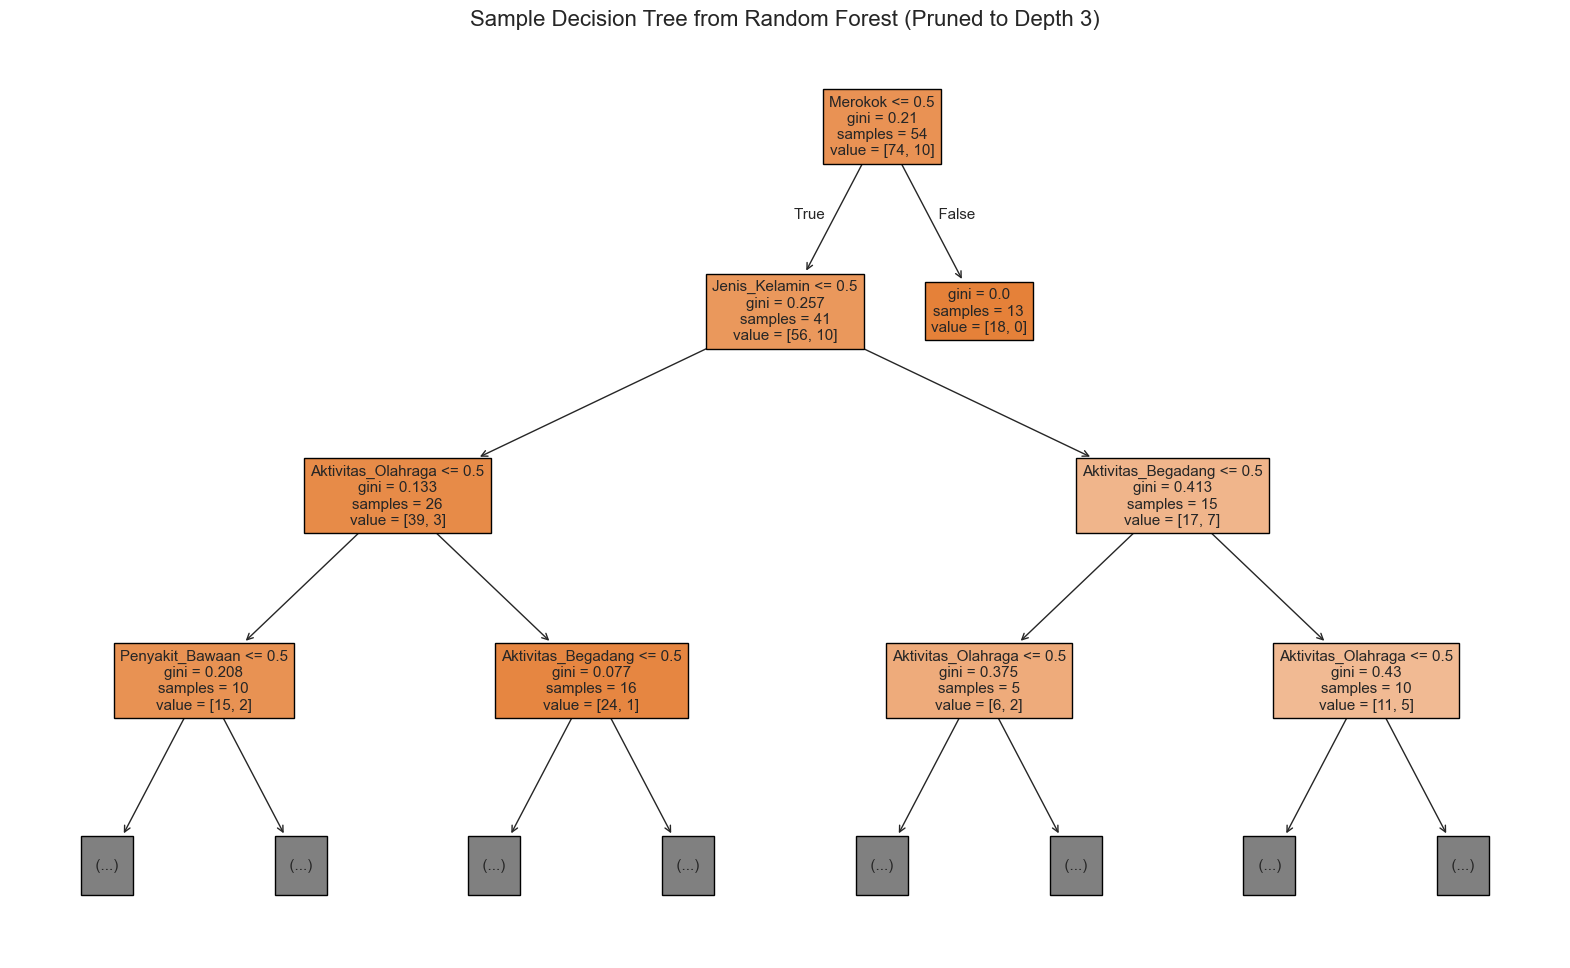

In [18]:
# Visualize a sample decision tree from the forest
from sklearn.tree import plot_tree

# Get a sample tree from the forest (first tree)
plt.figure(figsize=(20, 12))
plot_tree(best_rf.estimators_[0], feature_names=X.columns, filled=True, max_depth=3)
plt.title('Sample Decision Tree from Random Forest (Pruned to Depth 3)', fontsize=16)
plt.show()

# **Kesimpulan**

Dari hasil analisis menggunakan metode Random Forest pada dataset risiko penyakit paru-paru, dapat disimpulkan:

## **1. Performa Model**
- **Akurasi**: 90.91% - Model menunjukkan performa yang sangat baik dalam klasifikasi
- **ROC-AUC Score**: 0.85 (sebelum tuning) dan 0.80 (setelah tuning) - Menunjukkan kemampuan diskriminasi yang baik
- **Tantangan Dataset**: Model menghadapi ketidakseimbangan kelas yang signifikan, dimana kelas positif (risiko tinggi) hanya memiliki 2 sampel dari 22 data test, menyebabkan presisi 0.00 untuk kelas minoritas

## **2. Fitur Paling Berpengaruh (Feature Importance)**
Berdasarkan analisis Random Forest, urutan fitur dari yang paling penting:

1. **Aktivitas Begadang** (19.98%) - Faktor risiko terbesar
2. **Penyakit Bawaan** (18.19%) - Kondisi medis pre-existing
3. **Aktivitas Olahraga** (17.13%) - Faktor protektif yang penting
4. **Jenis Kelamin** (13.59%) - Faktor demografis signifikan
5. **Rumah Tangga** (11.19%) - Kondisi lingkungan tempat tinggal
6. **Merokok** (10.00%) - Kebiasaan berisiko klasik
7. **Usia** (7.70%) - Faktor demografis
8. **Bekerja** (0.67%) - Pengaruh minimal
9. **Asuransi** (0.56%) - Pengaruh minimal

## **3. Hyperparameter Tuning**
- **Parameter Optimal**: 
  - n_estimators: 100
  - max_depth: None (unlimited)
  - min_samples_split: 5
  - min_samples_leaf: 1
- **Cross-validation Score**: 88.16%
- Hyperparameter tuning meningkatkan stabilitas model meskipun ROC-AUC sedikit menurun

## **4. Analisis Prediksi Individual**
Dari 106 individu yang diprediksi, distribusi risiko menunjukkan:

- **Risiko Sangat Tinggi (>0.9)**: Individu 29, 30, dan 67 dengan probabilitas 0.96
- **Risiko Tinggi (0.5-0.9)**: Beberapa individu seperti 10, 17, 86 dengan probabilitas 0.58-0.77
- **Risiko Sedang (0.2-0.5)**: Sebagian besar individu berada dalam kategori ini
- **Risiko Rendah (<0.2)**: Mayoritas individu memiliki risiko rendah

## **5. Implikasi Klinis dan Kesehatan Masyarakat**

### **Faktor Risiko Utama yang Dapat Dimodifikasi:**
- **Aktivitas Begadang**: Mengatur pola tidur dan menghindari begadang
- **Kurang Aktivitas Olahraga**: Meningkatkan aktivitas fisik teratur
- **Kebiasaan Merokok**: Program penghentian merokok

### **Faktor Risiko Non-modifiabel:**
- **Penyakit Bawaan**: Memerlukan pemantauan medis rutin
- **Jenis Kelamin**: Pertimbangan dalam screening dan pencegahan
- **Usia**: Screening lebih intensif pada kelompok usia tertentu

## **6. Limitasi dan Rekomendasi**

### **Limitasi:**
- **Ketidakseimbangan Dataset**: Sangat sedikit kasus positif dalam data training
- **Ukuran Dataset**: Dataset relatif kecil (106 individu) untuk generalisasi yang robust
- **Precision Issues**: Model kesulitan memprediksi kelas minoritas (risiko tinggi)

### **Rekomendasi:**
1. **Pengumpulan Data**: Perlu lebih banyak sampel, terutama kasus positif
2. **Teknik Sampling**: Implementasi SMOTE atau teknik oversampling lainnya
3. **Validasi Eksternal**: Testing pada dataset independen
4. **Program Intervensi**: Fokus pada modifikasi faktor risiko yang dapat diubah

## **7. Kesimpulan Akhir**

Model Random Forest berhasil mengidentifikasi pola risiko penyakit paru-paru dengan akurasi tinggi, meskipun menghadapi tantangan ketidakseimbangan data. **Aktivitas begadang, penyakit bawaan, dan kurang olahraga** menjadi faktor risiko utama yang perlu mendapat perhatian khusus dalam program pencegahan. 

Model ini dapat digunakan sebagai alat screening awal, namun memerlukan perbaikan dalam menangani kelas minoritas untuk aplikasi klinis yang lebih optimal.